In [1]:
titanic = pd.read_csv('train_and_test2.csv')
titanic.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [3]:
titanic['Pclass'].head() #1st~3rd class

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [4]:
titanic['Embarked'].tail() # 0, 1, 2 // C = Cherbourg, Q = Queenstown, S = Southampton

1304    2.0
1305    0.0
1306    2.0
1307    2.0
1308    0.0
Name: Embarked, dtype: float64

In [5]:
titanic['sibsp'].tail() # of siblings / spouses aboard the Titanic

1304    0
1305    0
1306    0
1307    0
1308    1
Name: sibsp, dtype: int64

In [6]:
titanic['Parch'].tail() # of parents / children aboard the Titanic

1304    0
1305    0
1306    0
1307    0
1308    1
Name: Parch, dtype: int64

In [7]:
titanic['2urvived'].tail()

1304    0
1305    0
1306    0
1307    0
1308    0
Name: 2urvived, dtype: int64

So the feautres to consider refer to 'age', 'fare', 'sex', 'embarked', 'Pclass', ''sibsp', and 'Parch'  # 7 features
What I'm gonna do is to use these 7 features to maximaize the predictability of the model and practice.

First, I'll use matplotlib to visulize the relationship between the features and 'survived'


*Filled the missing values in 'Age' and 'Fare' attributes with the median of the data.

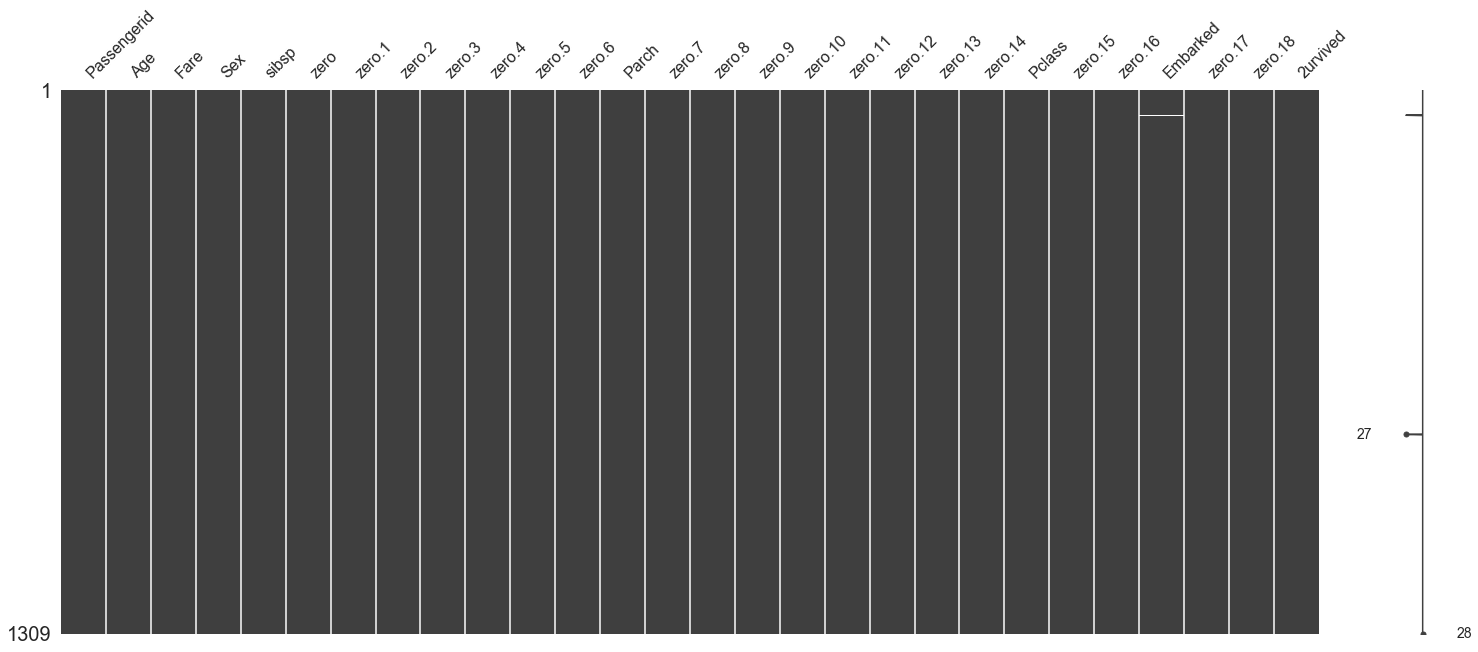

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64


In [8]:
import missingno as msno

msno.matrix(titanic)
plt.show()

print(titanic.isnull().sum())

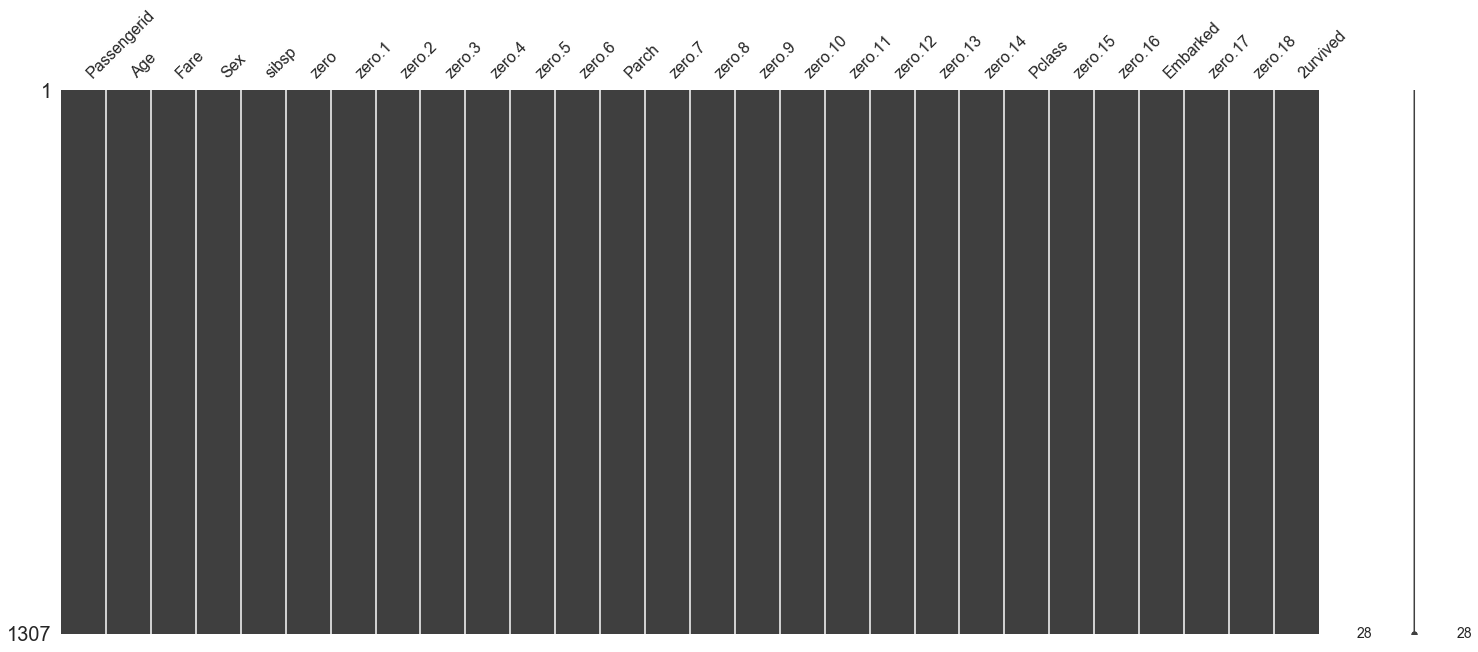

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
Pclass         0
zero.15        0
zero.16        0
Embarked       0
zero.17        0
zero.18        0
2urvived       0
dtype: int64


In [9]:
titanic = titanic.dropna() #결측치 있는 Embarked 행 2개 삭제(데이터 2개 삭제)

msno.matrix(titanic)
plt.show()
print(titanic.isnull().sum()) 

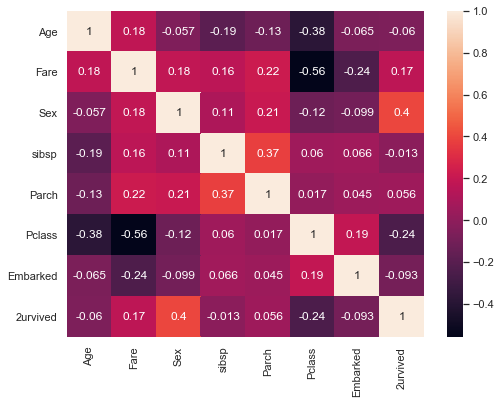

In [10]:
corr_list = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', '2urvived']
corr = titanic[corr_list].corr()  #Pearson Correlation Coefficient



mpl.pyplot.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, cbar=True)

Seems that most of the feautres except for 'sex' dont have strong relations with 'survived'.


Then let me check if there's use the linear regression model to see if each of thoes features have any linear relation with 'survived'. 

In [31]:
from sklearn.linear_model import LinearRegression

idx = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked']
feature = idx[i]
X0 = titanic[feature]
X = sm.add_constant(X0)
y = titanic['2urvived']

for i in range(7):

    model = sm.OLS(y, X)
    result = model.fit()
    print(f"{feature}의 회귀분석 결과", sep='\n')
    print(result.summary())

Embarked의 회귀분석 결과
                            OLS Regression Results                            
Dep. Variable:               2urvived   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.44
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           0.000740
Time:                        21:46:51   Log-Likelihood:                -771.99
No. Observations:                1307   AIC:                             1548.
Df Residuals:                    1305   BIC:                             1558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3351      0.025  

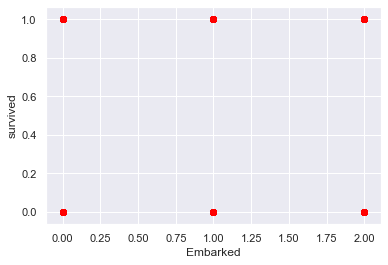

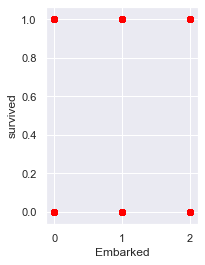

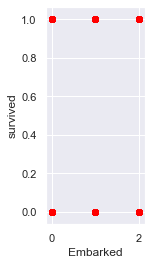

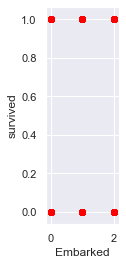

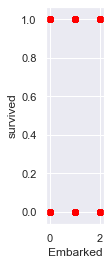

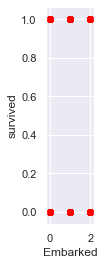

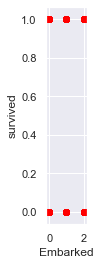

In [16]:
for i in range(7):
    plt.subplot(1, i+1, i+1)
    plt.scatter(X0, y, color='red')

    plt.xlabel(f"{feature}")
    plt.ylabel("survived")
    plt.show()

It doesnt look however like a linear correlation.

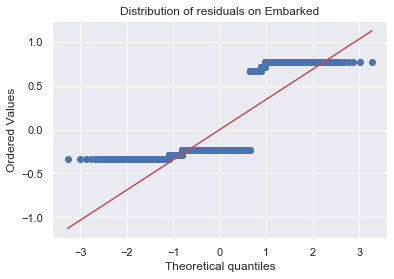

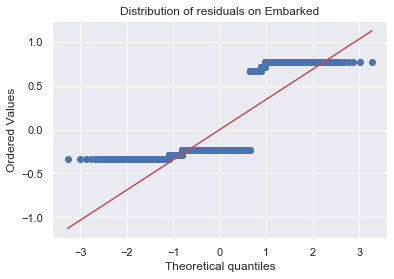

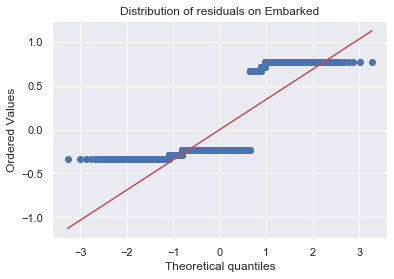

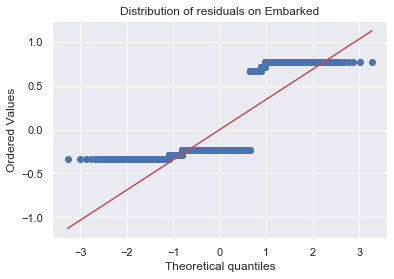

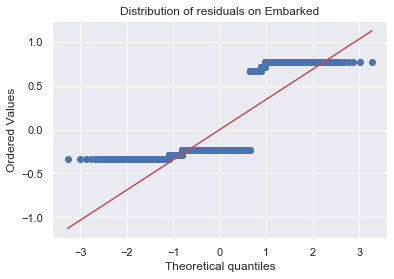

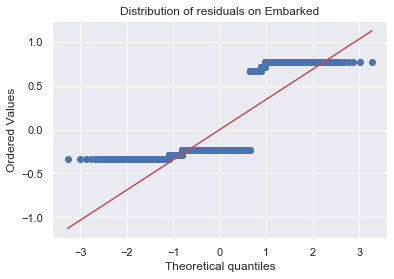

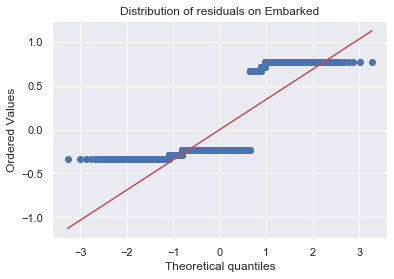

In [17]:
from sklearn.linear_model import LinearRegression

for i in range(7):

    model = sm.OLS(y, X)
    result = model.fit()
    sp.stats.probplot(result.resid, plot=plt)
    plt.title(f"Distribution of residuals on {feature}")
    plt.show()

Even the distribution of every residual is not equal to the linear regression.

If it were not for a linear regression, what would it be like for logistic regression?
It might work beter with the logistic regression model coz the dependnet variable has a binomial distribution.

In [38]:
titanic.rename(columns={'2urvived': 'survived'}, inplace=True)

corr_list2 = ['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass', 'Embarked', 'survived']
titanic2 = titanic[corr_list2]


titanic2 

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,survived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...
1304,28.0,8.0500,0,0,0,3,2.0,0
1305,39.0,108.9000,1,0,0,1,0.0,0
1306,38.5,7.2500,0,0,0,3,2.0,0
1307,28.0,8.0500,0,0,0,3,2.0,0


In [41]:
model2 = sm.Logit.from_formula("survived ~ Age + Sex + sibsp + Parch + Pclass + Embarked" , titanic2)
result2 = model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.461277
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1307
Model:                          Logit   Df Residuals:                     1300
Method:                           MLE   Df Model:                            6
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.1953
Time:                        21:56:01   Log-Likelihood:                -602.89
converged:                       True   LL-Null:                       -749.17
Covariance Type:            nonrobust   LLR p-value:                 3.195e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8865      0.348      2.550      0.011       0.205       1.568
Age           -0.0313      0.

유의확률을 0.05로 설정시 Age, Sex, sibsp,, Pclass가 유의미한 영향 끼침.
이를 고려하여 다시 로지스틱 회귀 실시.

In [46]:
model_final = sm.Logit.from_formula("survived ~ Age + Sex + sibsp + Pclass" , titanic2)
result_final = model_final.fit()
print(result_final.summary())

Optimization terminated successfully.
         Current function value: 0.461431
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1307
Model:                          Logit   Df Residuals:                     1302
Method:                           MLE   Df Model:                            4
Date:                Wed, 16 Sep 2020   Pseudo R-squ.:                  0.1950
Time:                        21:59:33   Log-Likelihood:                -603.09
converged:                       True   LL-Null:                       -749.17
Covariance Type:            nonrobust   LLR p-value:                 5.304e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8313      0.333      2.499      0.012       0.179       1.483
Age           -0.0310      0.

In [ ]:
logit_list = ['Age' , 'Sex' , 'sibsp' , 'Pclass']
X = titanic[logit_list]
y = titanic['survived']
plt.scatter(X, y)
plt.figure(figsize = [16, 16])
plt.show()

In [ ]:
confusion_matrix(y_true, y_pred)